<a href="https://colab.research.google.com/github/Shruti-Marathe/Complete-Python-3-Bootcamp/blob/master/Copy_of_load_kay_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fname = "kay_labels.npy"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/r638s/download
fname = "kay_images.npz"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/ymnjv/download

In [ ]:
with np.load(fname) as dobj:
    dat = dict(**dobj)
labels = np.load('kay_labels.npy')


`labels` is a 4 by stim array of class names:  
- row 3 has the labels predicted by a deep neural network (DNN) trained on Imagenet
- rows 0-2 correspond to different levels of the wordnet hierarchy for the DNN predictions

In [ ]:
print(labels[:,:4])

[['artifact' 'entity' 'animal' 'animal']
 ['instrumentality' 'round shape' 'vertebrate' 'vertebrate']
 ['equipment' 'sphere' 'mammal' 'amphibian']
 ['croquet ball' 'bubble' 'komondor' 'tailed frog']]


In [ ]:
print(dat.keys())

dict_keys(['stimuli', 'stimuli_test', 'responses', 'responses_test', 'roi', 'roi_names'])


`dat` has the following fields:  
- `stimuli`: stim x i x j array of grayscale stimulus images
- `stimuli_test`: stim x i x j array of grayscale stimulus images in the test set  
- `responses`: stim x voxel array of z-scored BOLD response amplitude
- `responses_test`:  stim x voxel array of z-scored BOLD response amplitude in the test set  
- `roi`: array of voxel labels
- `roi_names`: array of names corresponding to voxel labels

In [ ]:
print(dat["stimuli"].shape)

(1750, 128, 128)


In [ ]:
print(dat["responses"].shape)

(1750, 8428)


This is the number of voxels in each ROI. Note that `"Other"` voxels have been removed from this version of the dataset:

In [ ]:
dict(zip(dat["roi_names"], np.bincount(dat["roi"])))

{'LatOcc': 928,
 'Other': 0,
 'V1': 1294,
 'V2': 2083,
 'V3': 1790,
 'V3A': 484,
 'V3B': 314,
 'V4': 1535}

In [ ]:
roi_name = dat["roi_names"]
roi = dat["roi"]

v1 = [idx for idx, value in enumerate(roi) if roi_name[value] == 'V1']
v2 = [idx for idx, value in enumerate(roi) if roi_name[value] == 'V2']
v3 = [idx for idx, value in enumerate(roi) if roi_name[value] == 'V3']
v3a = [idx for idx, value in enumerate(roi) if roi_name[value] == 'V3A']
v3b = [idx for idx, value in enumerate(roi) if roi_name[value] == 'V3B']
v4 = [idx for idx, value in enumerate(roi) if roi_name[value] == 'V4']
lat_occ = [idx for idx, value in enumerate(roi) if roi_name[value] == 'LatOcc']

In [ ]:
import pandas as pd
import csv

def image_processing(greyscale_image):
  height, width = greyscale_image.shape
  return height, width

x = dat["responses"]
y = dat["stimuli"]
y_label = labels[1]

img = map(image_processing, y) 

labels_df = pd.read_csv('Kay_Gallant_labels_sorted.csv', header=None, 
                        names=['ID', 'Level0', 'Level1', 'Level2', 'Level3'],
                        skiprows=[0])

label_responses = {}
labels_ = {}
count = 1 
for idx in labels_df['ID']:
  stim_response = x[idx]
  label_name = labels_df.loc[labels_df['ID']==idx, 'Level0'].values
  #label0 = label_name[0]
  #print(count, idx, label_name)
  label_responses[idx] = [stim_response]
  labels_[idx] = label_name #[label0]
  count = count+1

df_labels = pd.DataFrame.from_dict(labels_, orient = 'index').reset_index()
df_1 = pd.DataFrame.from_dict(label_responses, orient='index').reset_index()
df_2 = pd.DataFrame(df_1[0].to_list())

df_v1 = df_2[v1]
df_v2 = df_2[v2]
df_v3 = df_2[v3]
df_v3a = df_2[v3a]
df_v3b = df_2[v3b]
df_v4 = df_2[v4]
df_LO = df_2[lat_occ]

df_stimuli = pd.concat([df_1['index'],df_v1,df_v2,df_v3,
                        df_v3a,df_v3b,df_v4,df_LO], axis = 1)


final_df = df_labels.merge(df_stimuli, on='index').drop('index',axis=1)
print(final_df)

#print(df_stimuli.head())
#print(df_labels.head())

#df_stimuli.to_csv('Label_StimuliResponses.csv', header = None)
#df_labels.to_csv('Labels.csv', header = None)

                       0_x       187       199  ...      7806      7895      7925
0                   animal -1.128249 -0.071425  ...  0.167658 -0.758194 -1.159723
1                   animal -0.668719  0.783184  ...  0.641528 -0.753326  1.487966
2                   animal -1.701397  0.560961  ...  0.352193 -0.541111  0.307382
3                   animal  0.259927 -0.641695  ...  0.256776 -0.295518  1.377963
4                   animal -0.955879 -0.134481  ...  0.421025 -0.212464  1.094887
...                    ...       ...       ...  ...       ...       ...       ...
1745  geological formation  0.340908  1.034292  ...  0.713022 -1.753712 -0.172571
1746  geological formation -0.017429 -0.527542  ...  1.501405  0.817182 -0.165860
1747                person -0.407849 -0.757657  ... -1.296368 -1.440580  0.135362
1748                person -0.152875  0.068077  ...  1.340908 -1.191760 -1.771838
1749                 plant -1.007446  0.318372  ... -0.461109  1.661874 -0.516015

[1750 rows x 84


Each stimulus is associated with a pattern of BOLD response across voxels in visual cortex:

In [ ]:
###### MIGHT NEED LATER #############
grouped_data = final_df.groupby('0_x')
groups = {}
for name, group in grouped_data:
  groups[name]=group.iloc[:,2:8430]

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix 
from sklearn.model_selection import train_test_split 

X = final_df.iloc[:, 1:1294]
y = final_df.iloc[:, 0]

class_names = ['animal' , 'artifact', 'entity', 'fruit',
              'fungus', 'geological formation','person',
              'plant']
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

# training a linear SVM classifier 
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

#svm_model = SVC(kernel = 'poly', C = 1).fit(X_train, y_train)
#svm_model = LinearSVC(penalty='l1', multi_class='crammer_singer',max_iter=1000).fit(X_train, y_train) 
svm_model = LogisticRegression()
OvR = OneVsRestClassifier(svm_model).fit(X_train, y_train)

#svm_predictions = svm_model.predict(X_test) 
svm_predictions = OvR.predict(X_test)

# model accuracy for X_test   
accuracy = svm_model.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
title = ["Confusion matrix"]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


NotFittedError: ignored

Train sample -  1312 Test sample -  438
Number of samples predicted(tested on) -  438
Accuracy -  36.757990867579906 %
['Confusion matrix']
[[61 57 11  8  0 20  0  0]
 [62 86 10 15  0 28  1  0]
 [ 6  2  1  1  0  2  0  0]
 [ 8  2  1  1  0  1  0  0]
 [ 1  1  1  0  0  0  0  0]
 [13 22  0  3  0 12  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]]


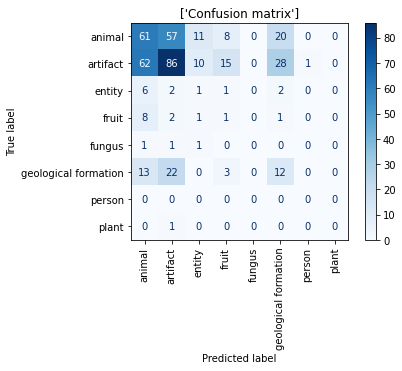

In [ ]:
######## LINEAR CLASSIFIER ##############
print("Train sample - ",len(X_train),"Test sample - ", len(X_test))
print("Number of samples predicted(tested on) - ",len(svm_predictions))
print("Accuracy - ", accuracy*100,"%")
disp = plot_confusion_matrix(svm_model, X_test, y_test,
                              display_labels=class_names, xticks_rotation = 'vertical',
                              cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

Train sample -  1312 Test sample -  438
Number of samples predicted(tested on) -  438
Accuracy -  55.70776255707762 %
['Confusion matrix']
[[ 96  56   0   0   0   5   0]
 [ 49 137   1   0   0  15   0]
 [  4   7   1   0   0   0   0]
 [  8   5   0   0   0   0   0]
 [  1   1   0   1   0   0   0]
 [  8  32   0   0   0  10   0]
 [  0   1   0   0   0   0   0]]


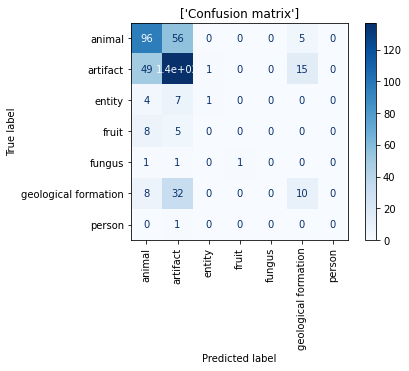

In [ ]:
######## LINEAR CLASSIFIER ##############
print("Train sample - ",len(X_train),"Test sample - ", len(X_test))
print("Number of samples predicted(tested on) - ",len(svm_predictions))
print("Accuracy - ", accuracy*100,"%")
disp = plot_confusion_matrix(svm_model, X_test, y_test,
                              display_labels=class_names, xticks_rotation = 'vertical',
                              cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

Train sample -  1312 Test sample -  438
Number of samples predicted(tested on) -  438
Accuracy -  46.34703196347032 %
['Confusion matrix']
[[  1 156   0   0   0   0   0]
 [  0 202   0   0   0   0   0]
 [  0  12   0   0   0   0   0]
 [  0  13   0   0   0   0   0]
 [  0   3   0   0   0   0   0]
 [  0  50   0   0   0   0   0]
 [  0   1   0   0   0   0   0]]


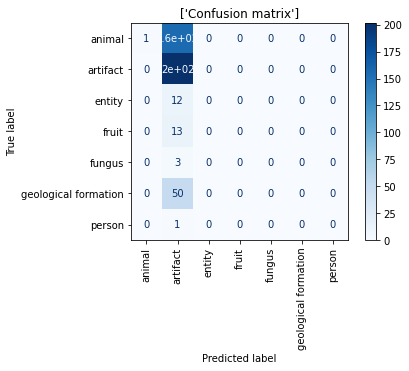

In [ ]:
######## POLYNOMIAL CLASSIFIER ##############
print("Train sample - ",len(X_train),"Test sample - ", len(X_test))
print("Number of samples predicted(tested on) - ",len(svm_predictions))
print("Accuracy - ", accuracy*100,"%")
disp = plot_confusion_matrix(svm_model, X_test, y_test,
                              display_labels=class_names, xticks_rotation = 'vertical',
                              cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

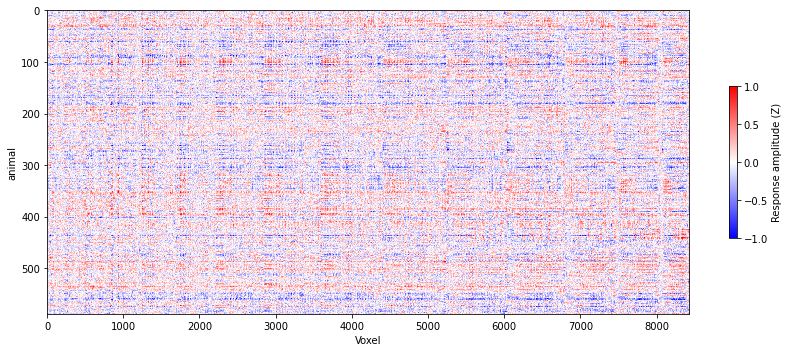

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel= "animal")
heatmap = ax.imshow(groups["animal"], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

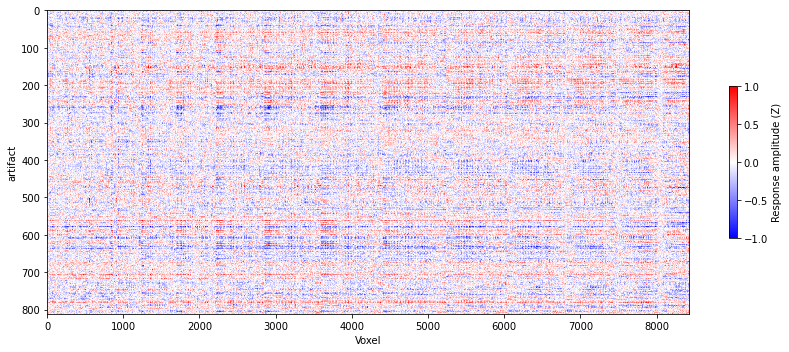

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="artifact")
heatmap = ax.imshow(groups["artifact"], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

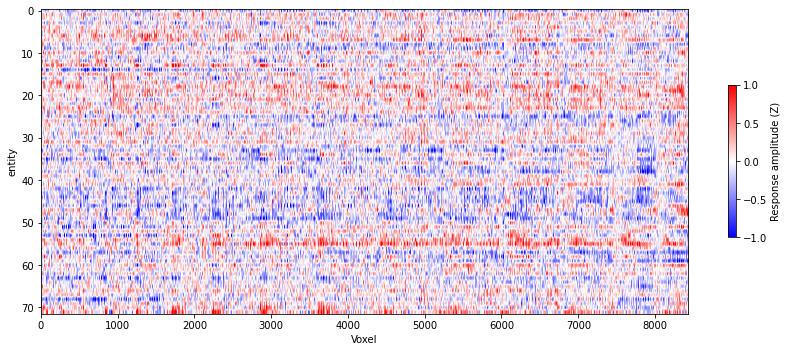

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="entity")
heatmap = ax.imshow(groups["entity"], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

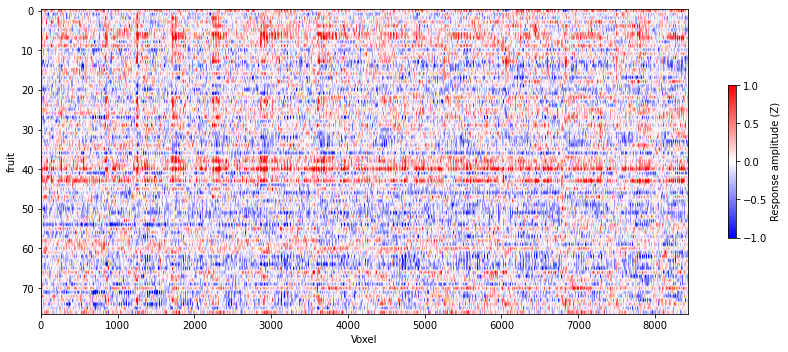

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="fruit")
heatmap = ax.imshow(groups["fruit"], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

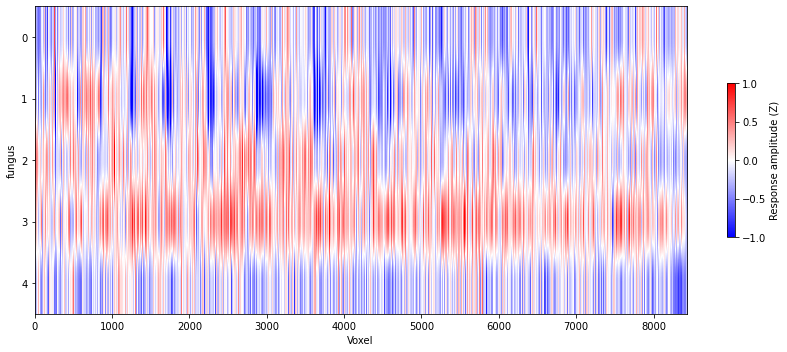

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="fungus")
heatmap = ax.imshow(groups["fungus"], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

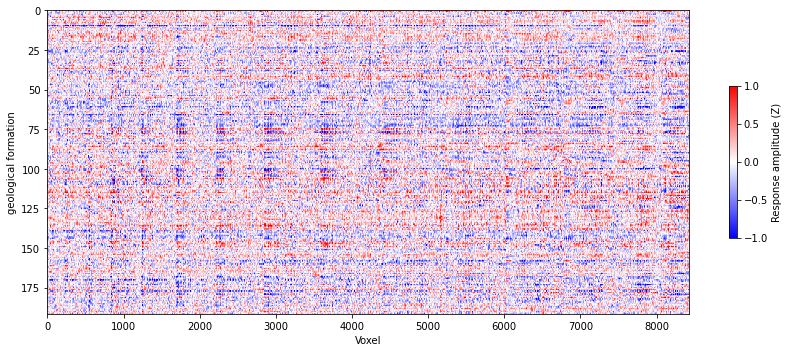

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="geological formation")
heatmap = ax.imshow(groups["geological formation"], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

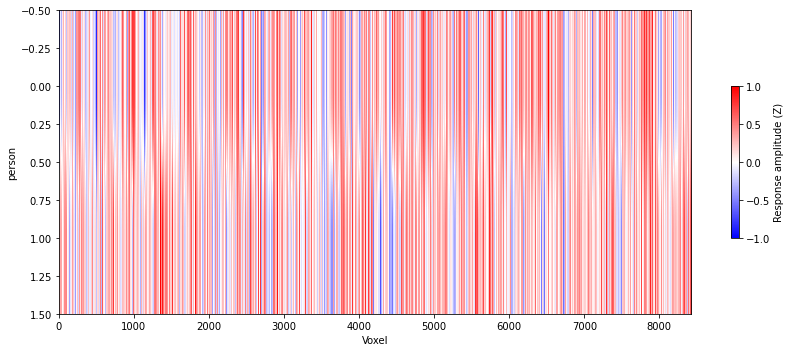

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="person")
heatmap = ax.imshow(groups["person"], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

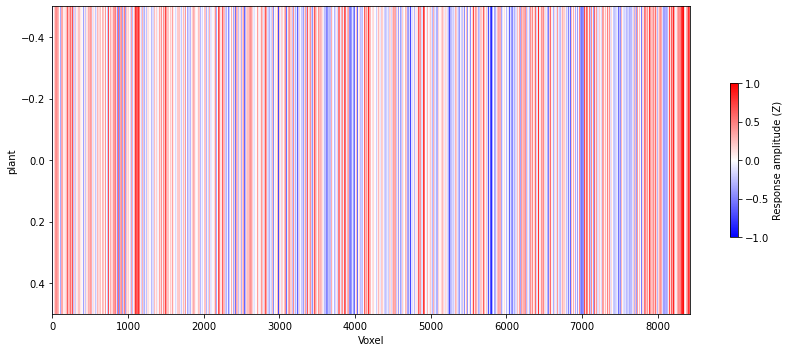

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="plant")
heatmap = ax.imshow(groups["plant"], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

The training/validation splits from the original paper are retained, so the 120 test stimuli and responses are in separate data structures:

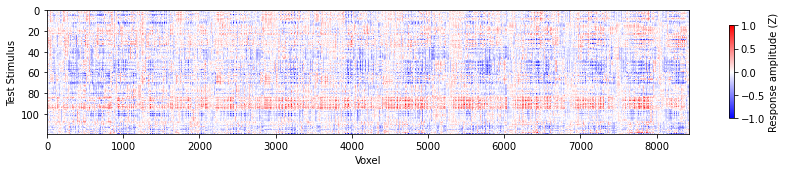

In [ ]:
f, ax = plt.subplots(figsize=(12, 2.5))
ax.set(xlabel="Voxel", ylabel="Test Stimulus")
heatmap = ax.imshow(dat["responses_test"], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.75, label="Response amplitude (Z)")
f.tight_layout()